## Ans : 1

In [1]:
import tensorflow as tf 
import keras

print(tf.__version__)
print(keras.__version__)

2.13.0
2.13.1


## Ans : 2

In [3]:
import opendatasets as od
data = od.download("https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification")

Skipping, found downloaded files in ".\wine-quality-binary-classification" (use force=True to force download)


In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [7]:
df = pd.read_csv("wine-quality-binary-classification/wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


## Ans : 3 

In [8]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.dtypes

## quality is categorical variable 

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                  object
dtype: object

In [11]:
df['quality'].unique()

array(['bad', 'good'], dtype=object)

In [12]:
df['quality'] = df['quality'].map({'bad':0 , 'good': 1})

In [13]:
df['quality'].unique()

array([0, 1], dtype=int64)

In [14]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Ans : 4

In [15]:
X = df.iloc[: , :-1]
y = df.iloc[:,-1]

In [16]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [17]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64

## Ans : 5

In [18]:
## train test split 

from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20, random_state=42)

X_train , X_val , y_train , y_val = train_test_split(X_train , y_train , test_size=0.20 , random_state=42)

In [19]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1023, 11)
(256, 11)
(320, 11)


In [20]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(1023,)
(256,)
(320,)


## Ans : 6 

In [21]:
## scaling of data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

In [23]:
X_train

array([[-0.36458197,  0.27028307, -0.88452628, ..., -1.50331912,
        -0.96231644, -0.61284241],
       [ 2.08646306, -0.82422292,  1.09972703, ..., -0.98778743,
        -0.29662295, -0.13057021],
       [ 0.86094055, -0.16751933,  1.09972703, ..., -0.02116552,
         0.70191728,  0.25524755],
       ...,
       [ 2.611687  , -1.26202532,  2.37168427, ..., -0.73002159,
         0.59096836,  0.35170199],
       [-0.4812984 ,  0.84489871, -1.03716115, ...,  0.4299247 ,
        -0.6294697 ,  0.44815643],
       [-1.06488055,  0.46182161, -1.39330918, ...,  0.94545638,
        -0.07472512, -1.19156904]])

In [24]:
X_val

array([[-0.63501047, -0.73223141,  0.17347516, ...,  0.90656745,
        -0.84912934, -0.85543866],
       [ 1.69055474,  0.54543041,  2.1157408 , ..., -0.57208528,
         0.29425274,  2.74986738],
       [-0.86189488,  0.54543041, -0.98138549, ...,  0.77214448,
         1.16860375, -0.76530601],
       ...,
       [-0.63501047, -1.03643661,  1.01337382, ...,  0.6377215 ,
         1.37037706,  0.58668375],
       [ 1.29350702, -0.67139037,  1.11836115, ..., -0.63929677,
         1.5048926 ,  0.85708171],
       [ 2.82497679, -1.15811869,  1.32833581, ..., -1.71468058,
         1.10134598, -0.76530601]])

In [25]:
X_test

array([[-3.33991288e-01,  2.42581186e-01, -9.63136787e-01, ...,
        -4.42561113e-01,  6.34928030e-02, -7.55088351e-01],
       [-2.78643172e-01, -9.49230728e-02, -4.94583756e-01, ...,
         5.19964189e-01, -1.15964614e+00, -8.44713081e-01],
       [ 1.32645219e+00,  8.61338994e-01, -2.34276516e-01, ...,
        -1.85887699e-01,  2.23796204e+00, -4.86214161e-01],
       ...,
       [-1.90259149e-03,  4.67584025e-01, -7.80921719e-02, ...,
        -1.02007629e+00, -8.19885325e-01, -5.75838891e-01],
       [ 2.74837989e-01, -1.38868940e+00,  6.50768099e-01, ...,
        -1.02007629e+00,  2.67349294e-01,  6.78907330e-01],
       [ 4.40882337e-01,  1.39572074e+00, -1.17138258e+00, ...,
        -1.21719346e-01, -7.51933161e-01, -6.65463621e-01]])

## Ans : 7 

In [31]:
LAYERS = [keras.layers.Dense(100,input_shape=(11,), activation = 'relu'),
         keras.layers.Dense(30,activation = 'relu'),
          keras.layers.Dense(1 , activation = 'sigmoid')
         ]

## Ans : 8 


In [32]:
model = keras.models.Sequential(LAYERS)

## Ans : 9

In [33]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")


## Ans : 10

In [34]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3 , mode = 'min')


## Ans : 11 

In [35]:
filepath = "callbacks/"

modelcp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor = "val_loss",
    save_best_only = True,
    mode = "min",
)

## Ans : 12

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               1200      
                                                                 
 dense_4 (Dense)             (None, 30)                3030      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4261 (16.64 KB)
Trainable params: 4261 (16.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Ans : 13 

In [40]:
loss = 'binary_crossentropy'
optimizer = 'adam'
metrics = ['accuracy']

## Ans : 14 

In [41]:
model.compile(loss = loss , optimizer = optimizer , metrics = metrics )

## Ans : 15 

In [42]:
history = model.fit(X_train , y_train ,validation_data=(X_val , y_val),epochs = 30, callbacks=[tensorboard_callback,es_callback,modelcp_callback] )

Epoch 1/30
31/32 [============================>.] - ETA: 0s - loss: 0.6300 - accuracy: 0.6421 INFO:tensorflow:Assets written to: callbacks\assets


INFO:tensorflow:Assets written to: callbacks\assets


32/32 [==============================] - 2s 37ms/step - loss: 0.6329 - accuracy: 0.6393 - val_loss: 0.6011 - val_accuracy: 0.7422
Epoch 2/30
31/32 [============================>.] - ETA: 0s - loss: 0.5448 - accuracy: 0.7429INFO:tensorflow:Assets written to: callbacks\assets


INFO:tensorflow:Assets written to: callbacks\assets


32/32 [==============================] - 1s 23ms/step - loss: 0.5385 - accuracy: 0.7478 - val_loss: 0.5476 - val_accuracy: 0.7734
Epoch 3/30
30/32 [===========================>..] - ETA: 0s - loss: 0.5103 - accuracy: 0.7469INFO:tensorflow:Assets written to: callbacks\assets


INFO:tensorflow:Assets written to: callbacks\assets


32/32 [==============================] - 1s 22ms/step - loss: 0.5083 - accuracy: 0.7478 - val_loss: 0.5407 - val_accuracy: 0.7852
Epoch 4/30
32/32 [==============================] - 0s 3ms/step - loss: 0.4930 - accuracy: 0.7605 - val_loss: 0.5461 - val_accuracy: 0.7734
Epoch 5/30
 1/32 [..............................] - ETA: 0s - loss: 0.5981 - accuracy: 0.6875INFO:tensorflow:Assets written to: callbacks\assets


INFO:tensorflow:Assets written to: callbacks\assets


32/32 [==============================] - 1s 24ms/step - loss: 0.4846 - accuracy: 0.7546 - val_loss: 0.5370 - val_accuracy: 0.7852
Epoch 6/30
28/32 [=========================>....] - ETA: 0s - loss: 0.4798 - accuracy: 0.7567INFO:tensorflow:Assets written to: callbacks\assets


INFO:tensorflow:Assets written to: callbacks\assets


32/32 [==============================] - 1s 22ms/step - loss: 0.4777 - accuracy: 0.7576 - val_loss: 0.5318 - val_accuracy: 0.7852
Epoch 7/30
32/32 [==============================] - 0s 3ms/step - loss: 0.4722 - accuracy: 0.7703 - val_loss: 0.5525 - val_accuracy: 0.7695
Epoch 8/30
32/32 [==============================] - 0s 3ms/step - loss: 0.4670 - accuracy: 0.7810 - val_loss: 0.5338 - val_accuracy: 0.7930
Epoch 9/30
32/32 [==============================] - 0s 3ms/step - loss: 0.4626 - accuracy: 0.7761 - val_loss: 0.5419 - val_accuracy: 0.7852
Epoch 10/30
32/32 [==============================] - 0s 3ms/step - loss: 0.4582 - accuracy: 0.7791 - val_loss: 0.5467 - val_accuracy: 0.7773
Epoch 11/30
32/32 [==============================] - 0s 3ms/step - loss: 0.4540 - accuracy: 0.7791 - val_loss: 0.5429 - val_accuracy: 0.7891
Epoch 12/30
32/32 [==============================] - 0s 3ms/step - loss: 0.4481 - accuracy: 0.7849 - val_loss: 0.5607 - val_accuracy: 0.7695
Epoch 13/30
32/32 [========

## Ans : 16

In [46]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 11),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_3_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_3',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 11),
    'units': 100,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'build_config':

In [53]:
model.count_params()

4261

## Ans : 17

In [54]:
df = pd.DataFrame(history.history)

In [55]:
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.632891,0.639296,0.601103,0.742188
1,0.538535,0.747801,0.547602,0.773438
2,0.508254,0.747801,0.540749,0.785156
3,0.493010,0.760508,0.546076,0.773438
4,0.484595,0.754643,0.537025,0.785156


## Ans : 18

<AxesSubplot:>

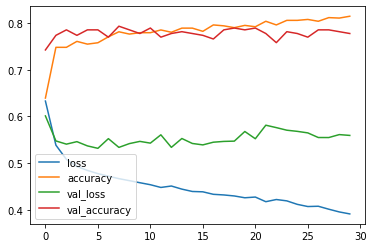

In [56]:
df.plot()

## Ans : 19

In [57]:
model.evaluate(X_test , y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.4955 - accuracy: 0.7531


[0.49553370475769043, 0.753125011920929]